# Procesamiento y Etiquetado de Datos

**Docente:** Ph.D. John William Branch  
**Asistente de Docencia:** Sergio Robles

Clasificación y Reconocimiento de Patrones  
Universidad Nacional - Sede Medellin

#### Entrega *(Fecha por Definir)*
* El Notebook debe ser enviado al correo: srobles@unal.edu.co
* El Asunto del correo debe ser: **CRP G1 - Taller 1**
* El Correo debe tener adjunto un Notebook resuelto (Archivo con extensión 'ipynb')

## Paquetes

Librerías y paquetes de python a utilizar en el siguiente notebook.  
(Deben estar previamente instalados)

In [1]:
%matplotlib inline
import random
import numpy as np
import pandas as pd
import cv2
import matplotlib.pyplot as plt
import skimage as sk
from skimage import transform
from skimage import util
from sklearn import preprocessing
from scipy import ndarray

In [2]:
# Utils
def random_rotation(image_array: ndarray):
    # pick a random degree of rotation between 25% on the left and 25% on the right
    random_degree = random.uniform(-25, 25)
    return sk.transform.rotate(image_array, random_degree)

def random_noise(image_array: ndarray):
    # add random noise to the image
    return sk.util.random_noise(image_array)

def horizontal_flip(image_array: ndarray):
    # horizontal flip doesn't need skimage, it's easy as flipping the image array of pixels !
    return image_array[:, ::-1]

## Datos Estructurados

Los datos estructurados son aquellos que estan organizados en variables o atributos. Comunmente se presentan o almacenan en matrices donde cada ejemplo es una fila de la matriz, y cada atributo, una columna.

In [5]:
# Tip: utilizar la librería pandas
# Tip: data/data.csv

# ESCRIBA SU CÓDIGO AQUÍ

data=pd.read_csv("data\data.csv",sep=';')

In [6]:
# Imprimir los primeros 5 ejemplos

# ESCRIBA SU CÓDIGO AQUÍ
data.head(5)

,INCIDENT_NUMBER,OFFENSE_CODE,OFFENSE_CODE_GROUP,OFFENSE_DESCRIPTION,DISTRICT,REPORTING_AREA,SHOOTING,OCCURRED_ON_DATE,YEAR,MONTH,DAY_OF_WEEK,HOUR,UCR_PART,STREET,Lat,Long
0,I182070945,619,Larceny,LARCENY ALL OTHERS,D14,808.0,NaN,2/09/2018 13:00,2018,9,Sunday,13,Part One,LINCOLN ST,4.235779e+09,-7.113937e+09
1,I182070943,1402,Vandalism,VANDALISM,C11,347.0,NaN,21/08/2018 0:00,2018,8,Tuesday,0,Part Two,HECLA ST,4.230682e+09,-7.106030e+09
2,I182070941,3410,Towed,TOWED MOTOR VEHICLE,D4,151.0,NaN,3/09/2018 19:27,2018,9,Monday,19,Part Three,CAZENOVE ST,4.234659e+09,-7.107243e+09
3,I182070940,3114,Investigate Property,INVESTIGATE PROPERTY,D4,272.0,NaN,3/09/2018 21:16,2018,9,Monday,21,Part Three,NEWCOMB ST,4.233418e+09,-7.107866e+09
4,I182070938,3114,Investigate Property,INVESTIGATE PROPERTY,B3,421.0,NaN,3/09/2018 21:05,2018,9,Monday,21,Part Three,DELHI ST,4.227537e+09,-7.109036e+09


In [7]:
# Imprimir el tamaño del DataFrame

# ESCRIBA SU CÓDIGO AQUÍ
data.shape

(319073, 16)

### Procesamiento de Datos

Aunque los datos estructurados esten organizados por atributos, no siempre se obtienen con las mejores condiciones. Debido a esto muchos conjuntos de datos pueden tener datos faltantes, datos errados, valores no estandarizados, etc.  
Por esto se busca realizar ciertas operaciones o procesamiento para mejorar la calidad de los datos.

### Datos Nulos

In [8]:
# Eliminar las filas donde al menos un dato sea nulo
# Tip: pandas dropna()

# ESCRIBA SU CÓDIGO AQUÍ

data=data.dropna()

In [9]:
# Imprime el tamaño del nuevo DataFrame

# ESCRIBA SU CÓDIGO AQUÍ
data.shape

(971, 16)

### Nuevos Atributos

In [10]:
# Crear un nuevo atributo (columna) en el DataFrame que sea una tupla así: (latitud, longitud)
# Tip: Utilizar list y zip de python

# ESCRIBA SU CÓDIGO AQUÍ

data.columns
new_f=zip(data['Lat'],data['Long'])
new_f = list(new_f)
data['Latitud_Longitud']=new_f

In [11]:
# Crear dos nuevos atributos (columnas) en el DataFrame donde una sea la fecha y la otra la hora
# Tip: Utilizar funciones lambda

# ESCRIBA SU CÓDIGO AQUÍ
#df['num_words_title'] = df.apply(lambda x : len(x['Title'].split(" ")),axis=1)
data['Fecha_Completa']=data.apply(lambda x: x['OCCURRED_ON_DATE'].split(' ')[0],axis=1)
data['Hora_Min']=data.apply(lambda x: x['OCCURRED_ON_DATE'].split(' ')[1],axis=1)

In [12]:
# Crear un nuevo atributo (columna) en el DataFrame que sea el número del día de la semana (Domingo 1 - Sabado 7)
# Tip: Utilizar funciones lambda

# ESCRIBA SU CÓDIGO AQUÍ
#list(set(data['DAY_OF_WEEK']))

def CambiaDia(x):
    if x =='Sunday':
        return 1
    elif x =='Monday':
        return 2
    elif x =='Tuesday':
        return 3
    elif x == 'Wednesday':
        return 4
    elif x == 'Thursday':
        return 5
    elif x == 'Friday':
        return 6
    else:
        return 7

data['Num_Dia']=data['DAY_OF_WEEK'].apply(CambiaDia)

### Variables dummies

Las variables o atributos categóricos son problemáticos a la hora de aplicar algunos métodos estadísticos y matemáticos. Para esto, se utiliza una técnica para generar nuevas variables que representen el dato de los atributos categóricos. Estas variables reciben el nombre de variables "dummies".

In [13]:
# Crear variabels dummies para el atributo UCR_PART
# Tip: Revisar documentación de pandas

# ESCRIBA SU CÓDIGO AQUÍ
dummy=pd.get_dummies(data['UCR_PART'])
data=pd.concat([data,dummy],axis=1)

In [14]:
# Imprimir los primeros 5 ejemplos

# ESCRIBA SU CÓDIGO AQUÍ
data.head(5)

,INCIDENT_NUMBER,OFFENSE_CODE,OFFENSE_CODE_GROUP,OFFENSE_DESCRIPTION,DISTRICT,REPORTING_AREA,SHOOTING,OCCURRED_ON_DATE,YEAR,MONTH,...,Lat,Long,Latitud_Longitud,Fecha_Completa,Hora_Min,Num_Dia,Other,Part One,Part Three,Part Two
1295,I182069509,413,Aggravated Assault,ASSAULT - AGGRAVATED - BATTERY,E18,540.0,Y,29/08/2018 23:19,2018,8,...,4.225041e+09,-7.113174e+09,"(4225040550.0, -7113173740.0)",29/08/2018,23:19,4,0,1,0,0
1860,I182068876,413,Aggravated Assault,ASSAULT - AGGRAVATED - BATTERY,B2,183.0,Y,27/08/2018 22:56,2018,8,...,4.232104e+09,-7.107215e+09,"(4232104169.0, -7107215291.0)",27/08/2018,22:56,2,0,1,0,0
3259,I182067317,111,Homicide,"MURDER, NON-NEGLIGIENT MANSLAUGHTER",B2,312.0,Y,22/08/2018 15:00,2018,8,...,4.231569e+09,-7.108951e+09,"(4231568920.0, -7108951391.0)",22/08/2018,15:00,4,0,1,0,0
3260,I182067317,2662,Ballistics,BALLISTICS EVIDENCE/FOUND,B2,312.0,Y,22/08/2018 15:00,2018,8,...,4.231569e+09,-7.108951e+09,"(4231568920.0, -7108951391.0)",22/08/2018,15:00,4,0,0,0,1
4107,I182066420,413,Aggravated Assault,ASSAULT - AGGRAVATED - BATTERY,A15,900.0,Y,19/08/2018 22:46,2018,8,...,4.237808e+09,-7.105784e+09,"(4237808452.0, -7105784115.0)",19/08/2018,22:46,1,0,1,0,0


### Análisis Estadístico

Al realizar análisis estadístico es posible concluir premisas erradas. Esto por la poco o baja calidad que pueden tener los datos. Por esto, se realizó todo un procesamiento con el fin de mejorar la precisión de los resultados estadísticos.

In [15]:
# Contar cuantos crimenes se realizaron por cada hora única
# Tip: Utilizar groupby de pandas

# ESCRIBA SU CÓDIGO AQUÍ
data.groupby('HOUR').size()

HOUR
0     103
1      45
2      61
3      25
4      17
5       7
6      10
8       7
9       4
10     17
11     13
12     18
13     40
14     30
15     40
16     83
17     41
18     59
19     55
20     48
21     69
22     89
23     90
dtype: int64

In [16]:
# Imprimir la media de las horas de crimenes realizados por cada día único
# Tip: Utilizar groupby de pandas

# ESCRIBA SU CÓDIGO AQUÍ
data.groupby(['DAY_OF_WEEK']).mean()['HOUR']

DAY_OF_WEEK
Friday       15.482014
Monday       15.446602
Saturday     10.536697
Sunday       11.809524
Thursday     14.095238
Tuesday      14.345794
Wednesday    15.633588
Name: HOUR, dtype: float64

### Normalización y Otros (No calificable)

La normalización de los datos es un paso importante en la utilizacón de modelos matemáticos y computacionales. Esta le permite a los modelos a utilizar encontrar el resultado en un menor número de pasos y/o repeticiones, así como mejorar la precisión entre las diferentes dimensiones (variables) que los datos puedan tener.

In [17]:
xs = np.random.uniform(-5, 5, (100))
ys = np.random.uniform(-5, 5, (100))

[-6, 6, -6, 6]

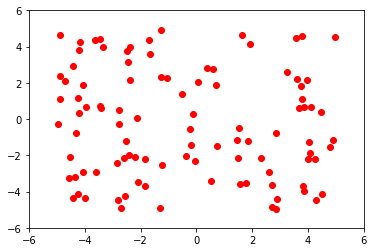

In [18]:
plt.plot(xs, ys, 'ro')
plt.axis([-6, 6, -6, 6])

In [19]:
X_scaled = preprocessing.scale(xs)
Y_scaled = preprocessing.scale(ys)

[-5, 5, -5, 5]

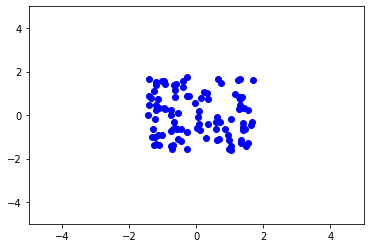

In [20]:
plt.plot(X_scaled, Y_scaled, 'bo')
plt.axis([-5, 5, -5, 5])

In [21]:
X_normalized = preprocessing.normalize([X_scaled], norm='l2')
Y_normalized = preprocessing.normalize([Y_scaled], norm='l2')

[-0.5, 0.5, -0.5, 0.5]

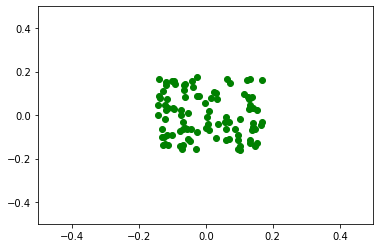

In [22]:
plt.plot(X_normalized, Y_normalized, 'go')
plt.axis([-0.5, 0.5, -0.5, 0.5])

## Datos No Estructurados

Los datos **no** estructurados se procesan diferente a los estructurados. Esto porque estos tipos de datos poseen características diferentes. Por ejemplo, una imagen tiene sus datos distribuidos de manera espacial, por lo que contiene más información que la que a simple vista se puede observar.

In [37]:
images = []
data = []

In [39]:
# Leer las 11 imagenes almacenadas en la ruta data/images y almacenarlas en el array images
# Tip: Utilizar opencv
# Tip: Las imagenes a través de opencv son leidas en formato BGR, cambiar el formato a RGB

# ESCRIBA SU CÓDIGO AQUÍ
for i in range(0,11):
    ruta="data/images/img"+str(i)+".jpg"
    img = cv2.imread(ruta,cv2.IMREAD_COLOR)
    img2= cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
    images.append(img2)


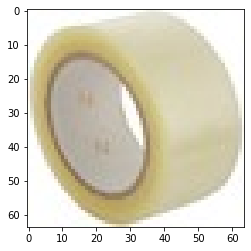

In [43]:
# Imprimir una imagen leida
# Tip: Utilizar matplotlib

# ESCRIBA SU CÓDIGO AQUÍ
plt.imshow(images[9])

In [44]:
### Normalización y Otros

Los datos no estructurados también pueden ser normalizados. Para las imágenes se realizan 3 tipos de procesos importantes: ajustar dimensionalidad (Resize), normalizar valores de intensidad (Normalize) y aumentar el dato (Augmentation Data)

In [45]:
images_resize = []

In [47]:
# Realizar un resize a las imagenes almacenas y guardarlas en la variable images_resize (128x128)
# Tip: Utilizar opencv

# ESCRIBA SU CÓDIGO AQUÍ
for l in images:
    img3 = cv2.resize(l,(128,128))
    images_resize.append(img3)

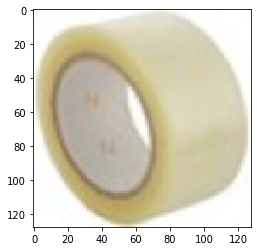

In [48]:
plt.imshow(images_resize[9])

In [49]:
images_normalize = []

In [50]:
for i in images_resize:
    aux = cv2.normalize(i, None, alpha=0, beta=1, norm_type=cv2.NORM_MINMAX, dtype=cv2.CV_32F)
    images_normalize.append(aux)

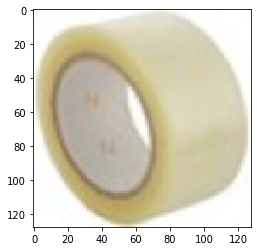

In [51]:
plt.imshow(images_resize[9])